Importing all the necessarylibraries from python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Import the dataset

In [4]:
data = pd.read_csv('customer_df.csv')

In [5]:
data.head()

,Customer_ID,Document Number,Document Date,Net due date,Amount in doc. curr.,Document type,Local Currency,Posting Date,Payment date,Invoice reference,Document currency,Eff.exchange rate,Clearing Document,Name 1
0,1001141939,1122001110,24/08/2022,24/08/2022,"35,556,562.19",RV,NGN,24/08/2022,31/08/2022,1122001110,NGN,1,6022011197,undries Limited
1,1001141939,1122001247,09/09/2022,09/09/2022,"-888,914.05",RV,NGN,09/09/2022,21/09/2022,1122001247,NGN,1,6022012262,undries Limited
2,1001142255,1122000217,07/03/2022,07/03/2022,"4,970,998.55",RV,NGN,07/03/2022,01/04/2022,1122000217,NGN,1,6022003871,IMITED - KADUNA
3,106084175,1122000321,31/03/2022,31/03/2022,"169,578.56",RV,NGN,31/03/2022,31/05/2022,1122000321,NGN,1,6022005677,ERIA ENTERPRISE
4,106084413,1122000225,08/03/2022,08/03/2022,"1,241,303.58",RV,NGN,08/03/2022,29/04/2022,1122000225,NGN,1,6022004248,Nigeria Limited


Do some data cleaning to make the dataset ready for business model

In [6]:
# Reduce the customer_id number
data['Customer_ID'] = data['Customer_ID'].apply(lambda x:str(x)[-5:])

In [7]:
# Drop rows with missing critical values
data = data.dropna(subset=['Document Date', 'Net due date', 'Customer_ID', 'Payment date','Posting Date'])

# Convert date columns to datetime format
data['Document Date'] = pd.to_datetime(data['Document Date'], dayfirst=True)
data['Net due date'] = pd.to_datetime(data['Net due date'], dayfirst=True)
data['Payment date'] = pd.to_datetime(data['Payment date'], dayfirst=True)
data['Posting Date'] = pd.to_datetime(data['Posting Date'], dayfirst=True)

In [8]:
# Calculate the days taken to pay an invoice
data['Days to Pay'] = (data['Payment date'] - data['Document Date']).dt.days

# Clean and convert 'Invoice Amount' to numeric
data['Invoice Amount'] = data['Amount in doc. curr.'].str.replace(',', '').astype(float)

# Calculate whether the payment was late
data['Late Payment'] = data['Payment date'] > data['Net due date']

# Create the target variable: 1 for late payers, 0 for early payers
late_threshold = 60
data['Is_Late_Payer'] = (data['Days to Pay'] > late_threshold).astype(int)

In [9]:
data.head()

,Customer_ID,Document Number,Document Date,Net due date,Amount in doc. curr.,Document type,Local Currency,Posting Date,Payment date,Invoice reference,Document currency,Eff.exchange rate,Clearing Document,Name 1,Days to Pay,Invoice Amount,Late Payment,Is_Late_Payer
0,41939,1122001110,2022-08-24,2022-08-24,"35,556,562.19",RV,NGN,2022-08-24,2022-08-31,1122001110,NGN,1,6022011197,undries Limited,7,35556562.19,True,0
1,41939,1122001247,2022-09-09,2022-09-09,"-888,914.05",RV,NGN,2022-09-09,2022-09-21,1122001247,NGN,1,6022012262,undries Limited,12,-888914.05,True,0
2,42255,1122000217,2022-03-07,2022-03-07,"4,970,998.55",RV,NGN,2022-03-07,2022-04-01,1122000217,NGN,1,6022003871,IMITED - KADUNA,25,4970998.55,True,0
3,84175,1122000321,2022-03-31,2022-03-31,"169,578.56",RV,NGN,2022-03-31,2022-05-31,1122000321,NGN,1,6022005677,ERIA ENTERPRISE,61,169578.56,True,1
4,84413,1122000225,2022-03-08,2022-03-08,"1,241,303.58",RV,NGN,2022-03-08,2022-04-29,1122000225,NGN,1,6022004248,Nigeria Limited,52,1241303.58,True,0


Model preparation, train, prediction and evaluation. The model to train here is Logistic Regression

In [10]:
#Using Logistic Regression model

# Select only numerical features for the model
features = ['Invoice Amount', 'Days to Pay']  # Add other relevant numerical features if available
X = data[features]
y = data['Is_Late_Payer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Precision: 1.00
Recall: 0.99
F1 Score: 1.00
Confusion Matrix:
[[523   0]
 [  2 216]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       523
           1       1.00      0.99      1.00       218

    accuracy                           1.00       741
   macro avg       1.00      1.00      1.00       741
weighted avg       1.00      1.00      1.00       741



Model preparation, train, prediction and evaluation. The model to train here is Random Forest Classifier model

In [12]:
# Using Random Forest Classifier model

# Convert date columns to datetime
date_columns = ['Document Date', 'Net due date', 'Posting Date', 'Payment date']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Ensure 'Amount in doc. curr.' and 'Eff.exchange rate' columns are string before replacing commas
data['Amount in doc. curr.'] = data['Amount in doc. curr.'].astype(str).str.replace(',', '')
data['Eff.exchange rate'] = data['Eff.exchange rate'].astype(str).str.replace(',', '')

# Convert these columns to float
data['Amount in doc. curr.'] = data['Amount in doc. curr.'].astype(float)
data['Eff.exchange rate'] = data['Eff.exchange rate'].astype(float)

# Feature Engineering
data['Days_to_due'] = (data['Net due date'] - data['Document Date']).dt.days
data['Days_to_payment'] = (data['Payment date'] - data['Document Date']).dt.days
data['Paid_on_time'] = data['Days_to_payment'] <= data['Days_to_due']

# Encode categorical variables
label_encoder = LabelEncoder()
data['Document type'] = label_encoder.fit_transform(data['Document type'])
data['Local Currency'] = label_encoder.fit_transform(data['Local Currency'])
data['Document currency'] = label_encoder.fit_transform(data['Document currency'])
data['Name 1'] = label_encoder.fit_transform(data['Name 1'])

# Select features and target
# Exclude 'Posting Date' as it is a datetime object
X = data[['Customer_ID', 'Amount in doc. curr.', 'Document type', 'Local Currency', 'Days_to_due']]
y = data['Paid_on_time']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[360  99]
 [ 98 184]]
              precision    recall  f1-score   support

       False       0.79      0.78      0.79       459
        True       0.65      0.65      0.65       282

    accuracy                           0.73       741
   macro avg       0.72      0.72      0.72       741
weighted avg       0.73      0.73      0.73       741



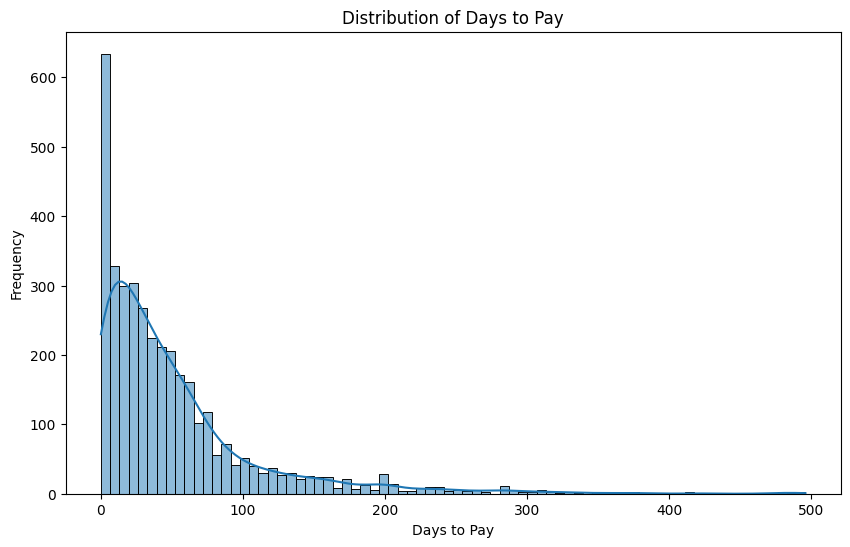

Percentage of late payments: 58.94%


In [13]:
# Plot distribution of days to pay
plt.figure(figsize=(10, 6))
sns.histplot(data['Days to Pay'], kde=True)
plt.title('Distribution of Days to Pay')
plt.xlabel('Days to Pay')
plt.ylabel('Frequency')
plt.show()

# Plot percentage of late payments
late_payment_percentage = data['Late Payment'].mean() * 100
print(f"Percentage of late payments: {late_payment_percentage:.2f}%")

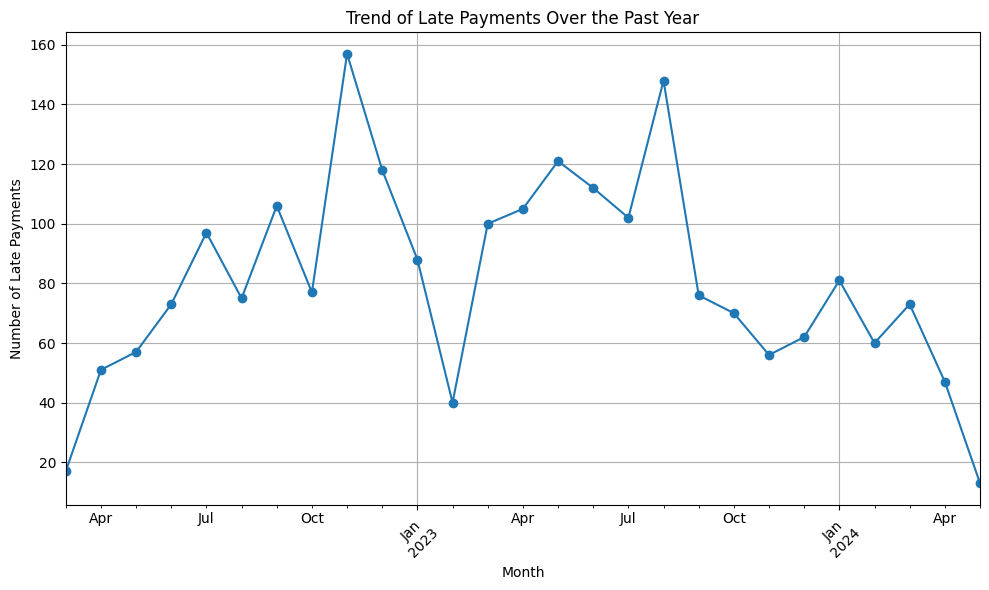

In [14]:
# Group by month and count late payments
data['Month'] = data['Payment date'].dt.to_period('M')
monthly_late_payments = data.groupby('Month')['Late Payment'].sum()

# Plotting the trend of late payments over the past year
plt.figure(figsize=(10, 6))
monthly_late_payments.plot(kind='line', marker='o')
plt.title('Trend of Late Payments Over the Past Year')
plt.xlabel('Month')
plt.ylabel('Number of Late Payments')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

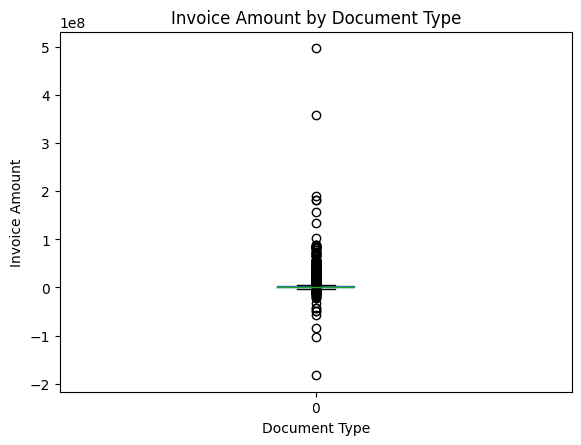

In [20]:
plt.figure(figsize=(10, 6))
data.boxplot(column='Invoice Amount', by='Document type', grid=False)
plt.title('Invoice Amount by Document Type')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Document Type')
plt.ylabel('Invoice Amount')
plt.show()

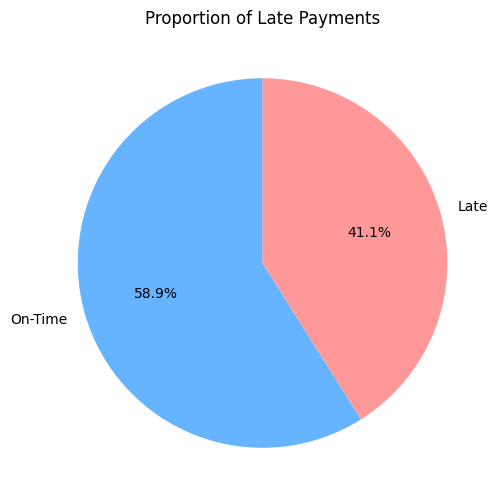

In [23]:
late_payment_counts = data['Late Payment'].value_counts()
plt.figure(figsize=(6, 6))
late_payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'], labels=['On-Time', 'Late'])
plt.title('Proportion of Late Payments')
plt.ylabel('')
plt.show()

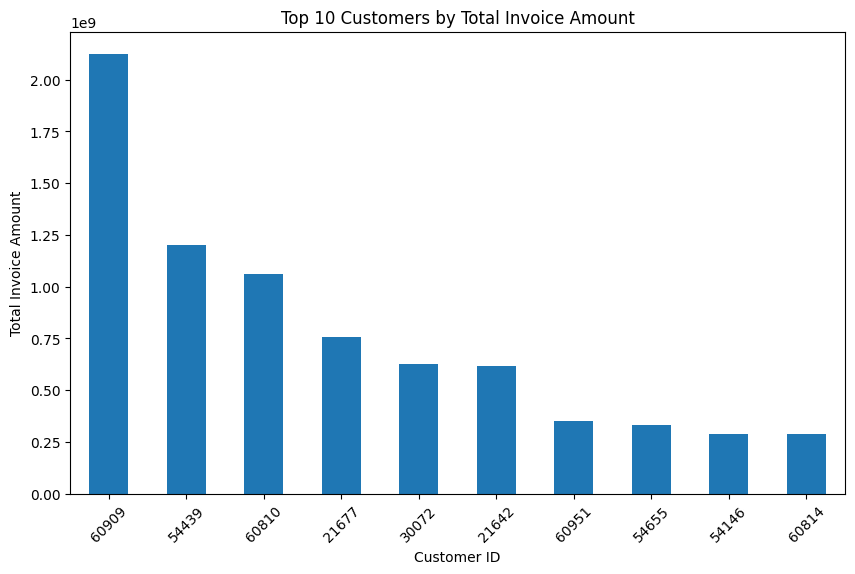

In [25]:
customer_invoice_totals = data.groupby('Customer_ID')['Invoice Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
customer_invoice_totals.plot(kind='bar')
plt.title('Top 10 Customers by Total Invoice Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Invoice Amount')
plt.xticks(rotation=45)
plt.show()

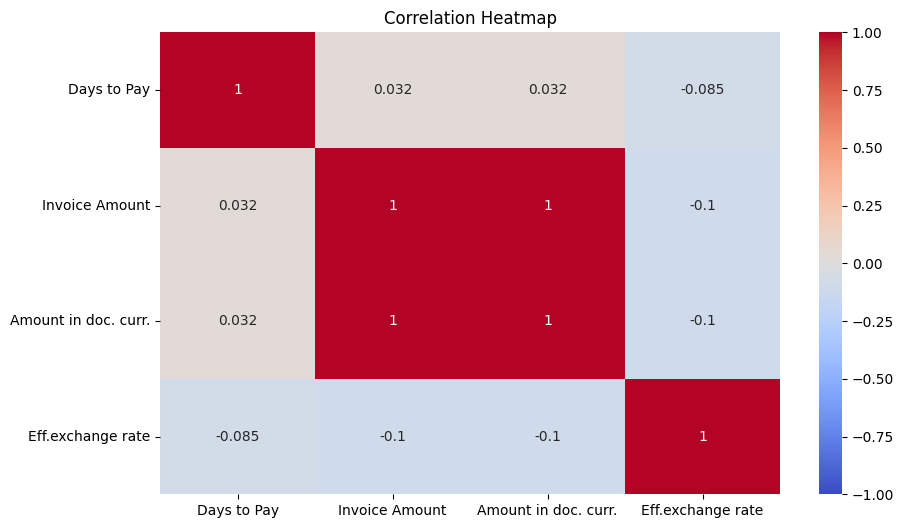

In [24]:
# Select numerical columns for correlation analysis
numerical_cols = ['Days to Pay', 'Invoice Amount', 'Amount in doc. curr.', 'Eff.exchange rate']
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

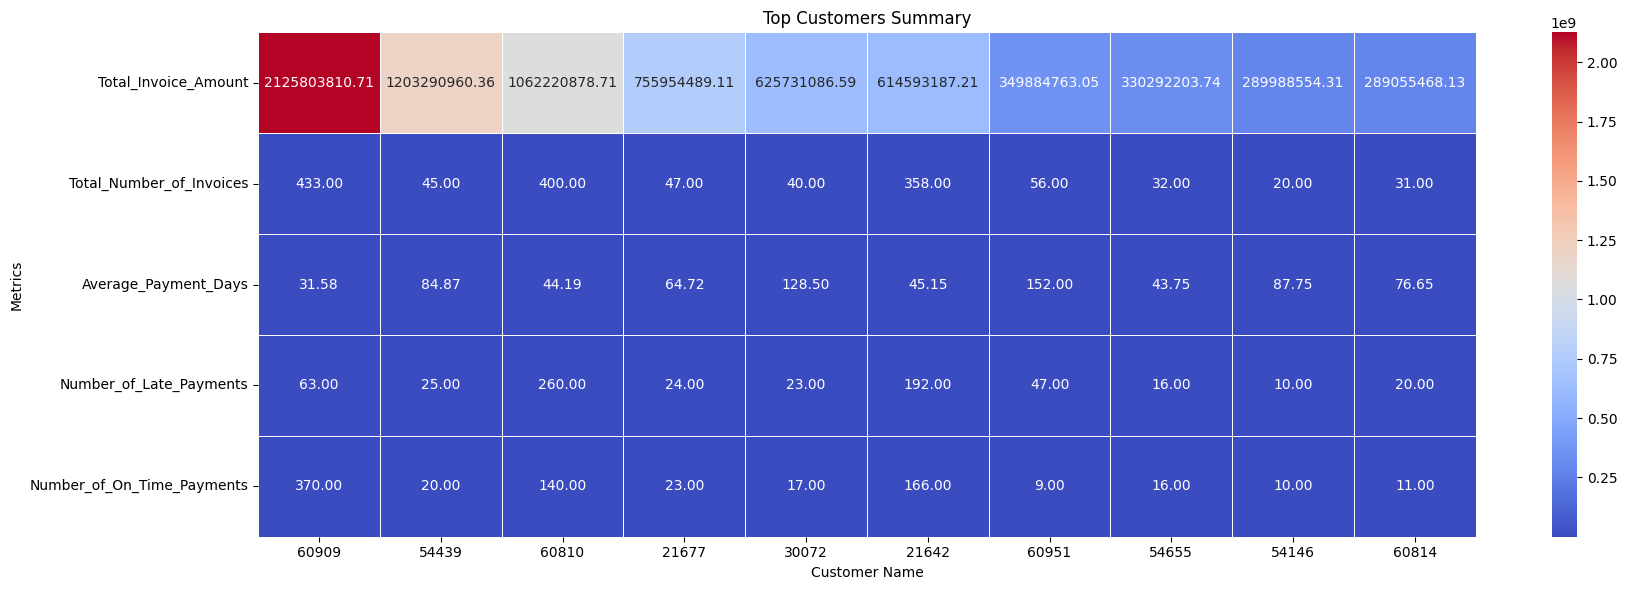

In [38]:
# Calculate necessary metrics
summary_data = data.groupby('Customer_ID').agg(
    Total_Invoice_Amount=('Invoice Amount', 'sum'),
    Total_Number_of_Invoices=('Document Number', 'count'),
    Average_Payment_Days=('Days to Pay', 'mean'),
    Number_of_Late_Payments=('Late Payment', 'sum'),
    Number_of_On_Time_Payments=('Late Payment', lambda x: (x == 0).sum())
).reset_index()

# Sort the summary table by Total Invoice Amount and select top 10 or 15 customers
top_customers = summary_data.sort_values(by='Total_Invoice_Amount', ascending=False).head(10)  # change to 15 if needed

# Visualize the table
plt.figure(figsize=(18, 6))
sns.heatmap(top_customers.set_index('Customer_ID').T, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Top Customers Summary')
plt.xlabel('Customer Name')
plt.ylabel('Metrics')
plt.tight_layout()
plt.show()

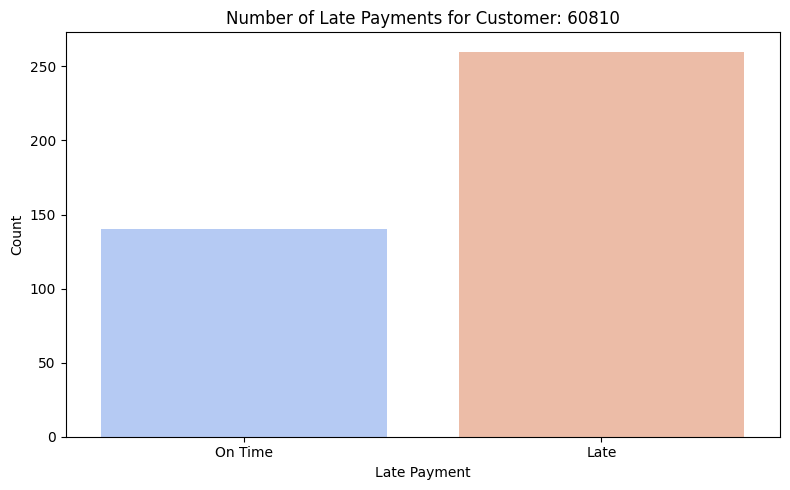

Customer with the highest number of late payments:
Name: 60810
Number of Late Payments: 260


In [47]:
# Calculate the number of late payments for each customer
late_payments = data.groupby('Customer_ID')['Late Payment'].sum().reset_index()

# Identify the customer with the highest number of late payments
top_late_payer = late_payments.sort_values(by='Late Payment', ascending=False).iloc[0]

# Filter data for the customer with the highest number of late payments
top_customer_data = data[data['Customer_ID'] == top_late_payer['Customer_ID']]

# Plot the number of late payments for the top customer
plt.figure(figsize=(8, 5))
sns.countplot(data=top_customer_data, x='Late Payment', hue='Late Payment', palette='coolwarm', legend=False)
plt.title(f'Number of Late Payments for Customer: {top_late_payer["Customer_ID"]}')
plt.xlabel('Late Payment')
plt.ylabel('Count')
plt.xticks([0, 1], ['On Time', 'Late'])
plt.tight_layout()
plt.show()

# Print the top customer details
print(f"Customer with the highest number of late payments:")
print(f"Name: {top_late_payer['Customer_ID']}")
print(f"Number of Late Payments: {top_late_payer['Late Payment']}")

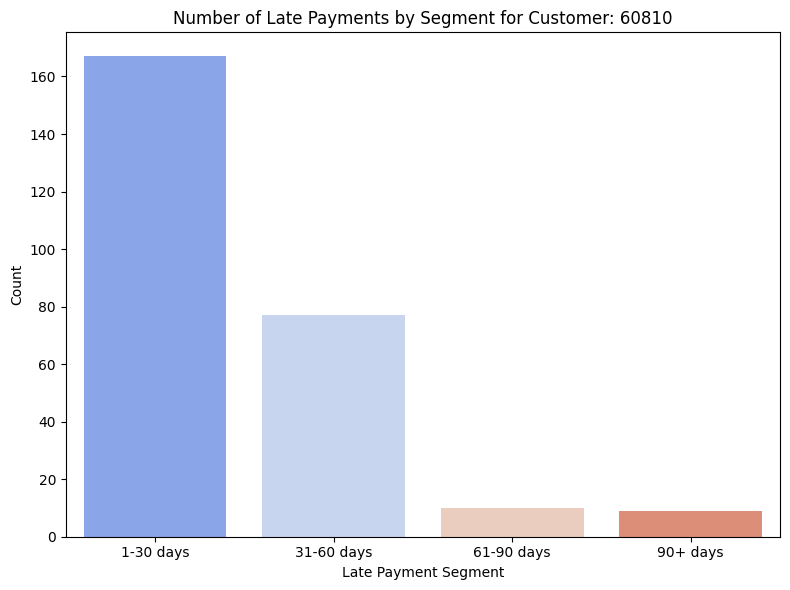

Customer with the highest number of late payments:
Name: 60810
Number of Late Payments: 260


In [51]:
# Create a 'Days Late' column
data['Days Late'] = (data['Payment date'] - data['Net due date']).dt.days

# Create a 'Late Payment Segment' column
bins = [0, 30, 60, 90, float('inf')]
labels = ['1-30 days', '31-60 days', '61-90 days', '90+ days']
data['Late Payment Segment'] = pd.cut(data['Days Late'], bins=bins, labels=labels, right=False)

# Calculate the number of late payments for each customer
late_payments = data.groupby('Customer_ID')['Late Payment'].sum().reset_index()

# Identify the customer with the highest number of late payments
top_late_payer = late_payments.sort_values(by='Late Payment', ascending=False).iloc[0]

# Filter data for the customer with the highest number of late payments
top_customer_data = data[data['Customer_ID'] == top_late_payer['Customer_ID']]

# Plot the number of late payments by segment for the top customer
plt.figure(figsize=(8, 6))
sns.countplot(data=top_customer_data, x='Late Payment Segment', hue='Late Payment Segment', palette='coolwarm', legend=False)
plt.title(f'Number of Late Payments by Segment for Customer: {top_late_payer["Customer_ID"]}')
plt.xlabel('Late Payment Segment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Print the top customer details
print(f"Customer with the highest number of late payments:")
print(f"Name: {top_late_payer['Customer_ID']}")
print(f"Number of Late Payments: {top_late_payer['Late Payment']}")

In [52]:
data.head()

,Customer_ID,Document Number,Document Date,Net due date,Amount in doc. curr.,Document type,Local Currency,Posting Date,Payment date,Invoice reference,...,Days to Pay,Invoice Amount,Late Payment,Is_Late_Payer,Days_to_due,Days_to_payment,Paid_on_time,Month,Days Late,Late Payment Segment
0,41939,1122001110,2022-08-24,2022-08-24,35556562.19,0,0,2022-08-24,2022-08-31,1122001110,...,7,35556562.19,True,0,0,7,False,2022-08,7,1-30 days
1,41939,1122001247,2022-09-09,2022-09-09,-888914.05,0,0,2022-09-09,2022-09-21,1122001247,...,12,-888914.05,True,0,0,12,False,2022-09,12,1-30 days
2,42255,1122000217,2022-03-07,2022-03-07,4970998.55,0,0,2022-03-07,2022-04-01,1122000217,...,25,4970998.55,True,0,0,25,False,2022-04,25,1-30 days
3,84175,1122000321,2022-03-31,2022-03-31,169578.56,0,0,2022-03-31,2022-05-31,1122000321,...,61,169578.56,True,1,0,61,False,2022-05,61,61-90 days
4,84413,1122000225,2022-03-08,2022-03-08,1241303.58,0,0,2022-03-08,2022-04-29,1122000225,...,52,1241303.58,True,0,0,52,False,2022-04,52,31-60 days


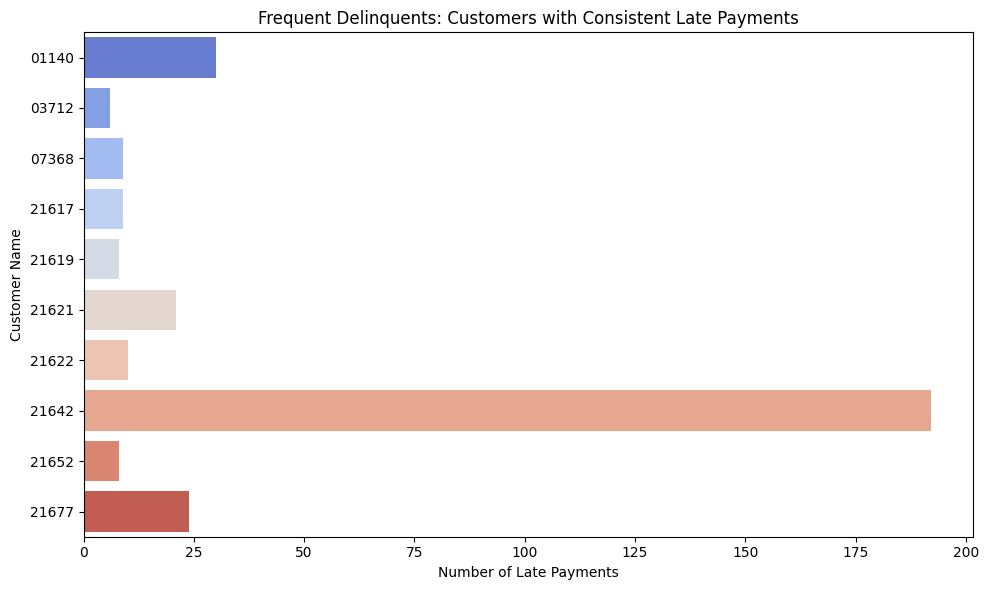

Frequent Delinquents:
   Customer_ID  Late Payment
3        01140            30
8        03712             6
15       07368             9
36       21617             9
37       21619             8
38       21621            21
39       21622            10
43       21642           192
48       21652             8
54       21677            24


In [59]:
# Set a threshold for frequent delinquents
threshold = 5  # You can adjust this threshold as needed

# Identify frequent delinquents
frequent_delinquents = late_payments[late_payments['Late Payment'] > threshold].head(10)

# Plot the number of late payments for frequent delinquents
plt.figure(figsize=(10, 6))
sns.barplot(data=frequent_delinquents, x='Late Payment', y='Customer_ID', hue='Customer_ID', palette='coolwarm',legend=False)
plt.title('Frequent Delinquents: Customers with Consistent Late Payments')
plt.xlabel('Number of Late Payments')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

# Print details of frequent delinquents
print("Frequent Delinquents:")
print(frequent_delinquents)

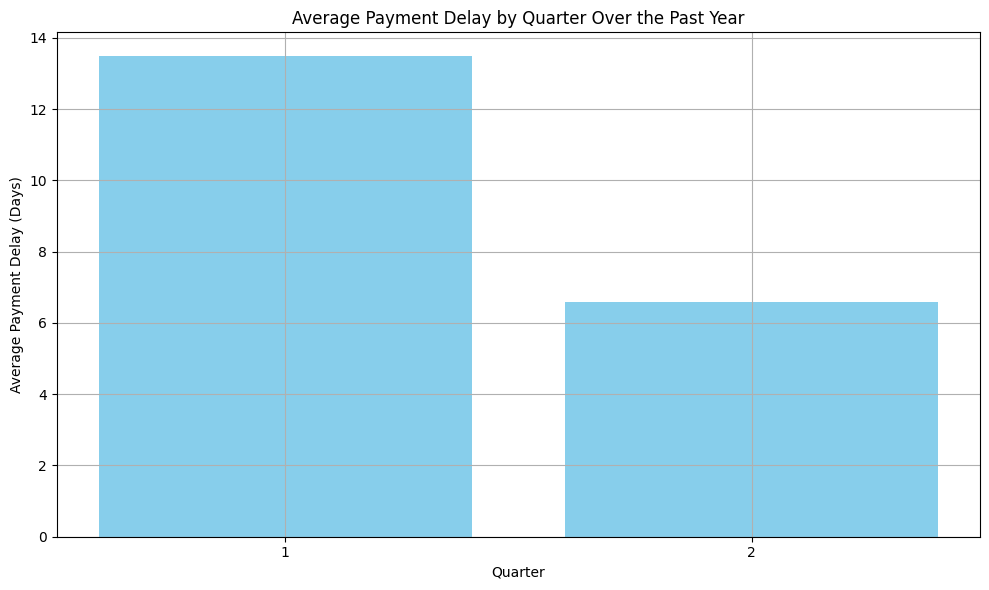

In [64]:
# Extract year and quarter from 'Payment date'
data['Year'] = data['Payment date'].dt.year
data['Quarter'] = data['Payment date'].dt.quarter

# Filter data for the past year
current_year = data['Year'].max()
past_year_data = data[data['Year'] == current_year]

# Calculate the average payment delay by quarter
avg_delay_by_quarter = past_year_data.groupby(['Year', 'Quarter'])['Days Late'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_delay_by_quarter['Quarter'], avg_delay_by_quarter['Days Late'], color='skyblue')
plt.title('Average Payment Delay by Quarter Over the Past Year')
plt.xlabel('Quarter')
plt.ylabel('Average Payment Delay (Days)')
plt.xticks(avg_delay_by_quarter['Quarter'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
data.head()

,Customer_ID,Document Number,Document Date,Net due date,Amount in doc. curr.,Document type,Local Currency,Posting Date,Payment date,Invoice reference,...,Is_Late_Payer,Days_to_due,Days_to_payment,Paid_on_time,Month,Days Late,Late Payment Segment,Year,Quarter,Payment Delay
0,41939,1122001110,2022-08-24,2022-08-24,35556562.19,0,0,2022-08-24,2022-08-31,1122001110,...,0,0,7,False,2022-08,7,1-30 days,2022,3,7
1,41939,1122001247,2022-09-09,2022-09-09,-888914.05,0,0,2022-09-09,2022-09-21,1122001247,...,0,0,12,False,2022-09,12,1-30 days,2022,3,12
2,42255,1122000217,2022-03-07,2022-03-07,4970998.55,0,0,2022-03-07,2022-04-01,1122000217,...,0,0,25,False,2022-04,25,1-30 days,2022,2,25
3,84175,1122000321,2022-03-31,2022-03-31,169578.56,0,0,2022-03-31,2022-05-31,1122000321,...,1,0,61,False,2022-05,61,61-90 days,2022,2,61
4,84413,1122000225,2022-03-08,2022-03-08,1241303.58,0,0,2022-03-08,2022-04-29,1122000225,...,0,0,52,False,2022-04,52,31-60 days,2022,2,52


This is a dashboard visual for the data analysis

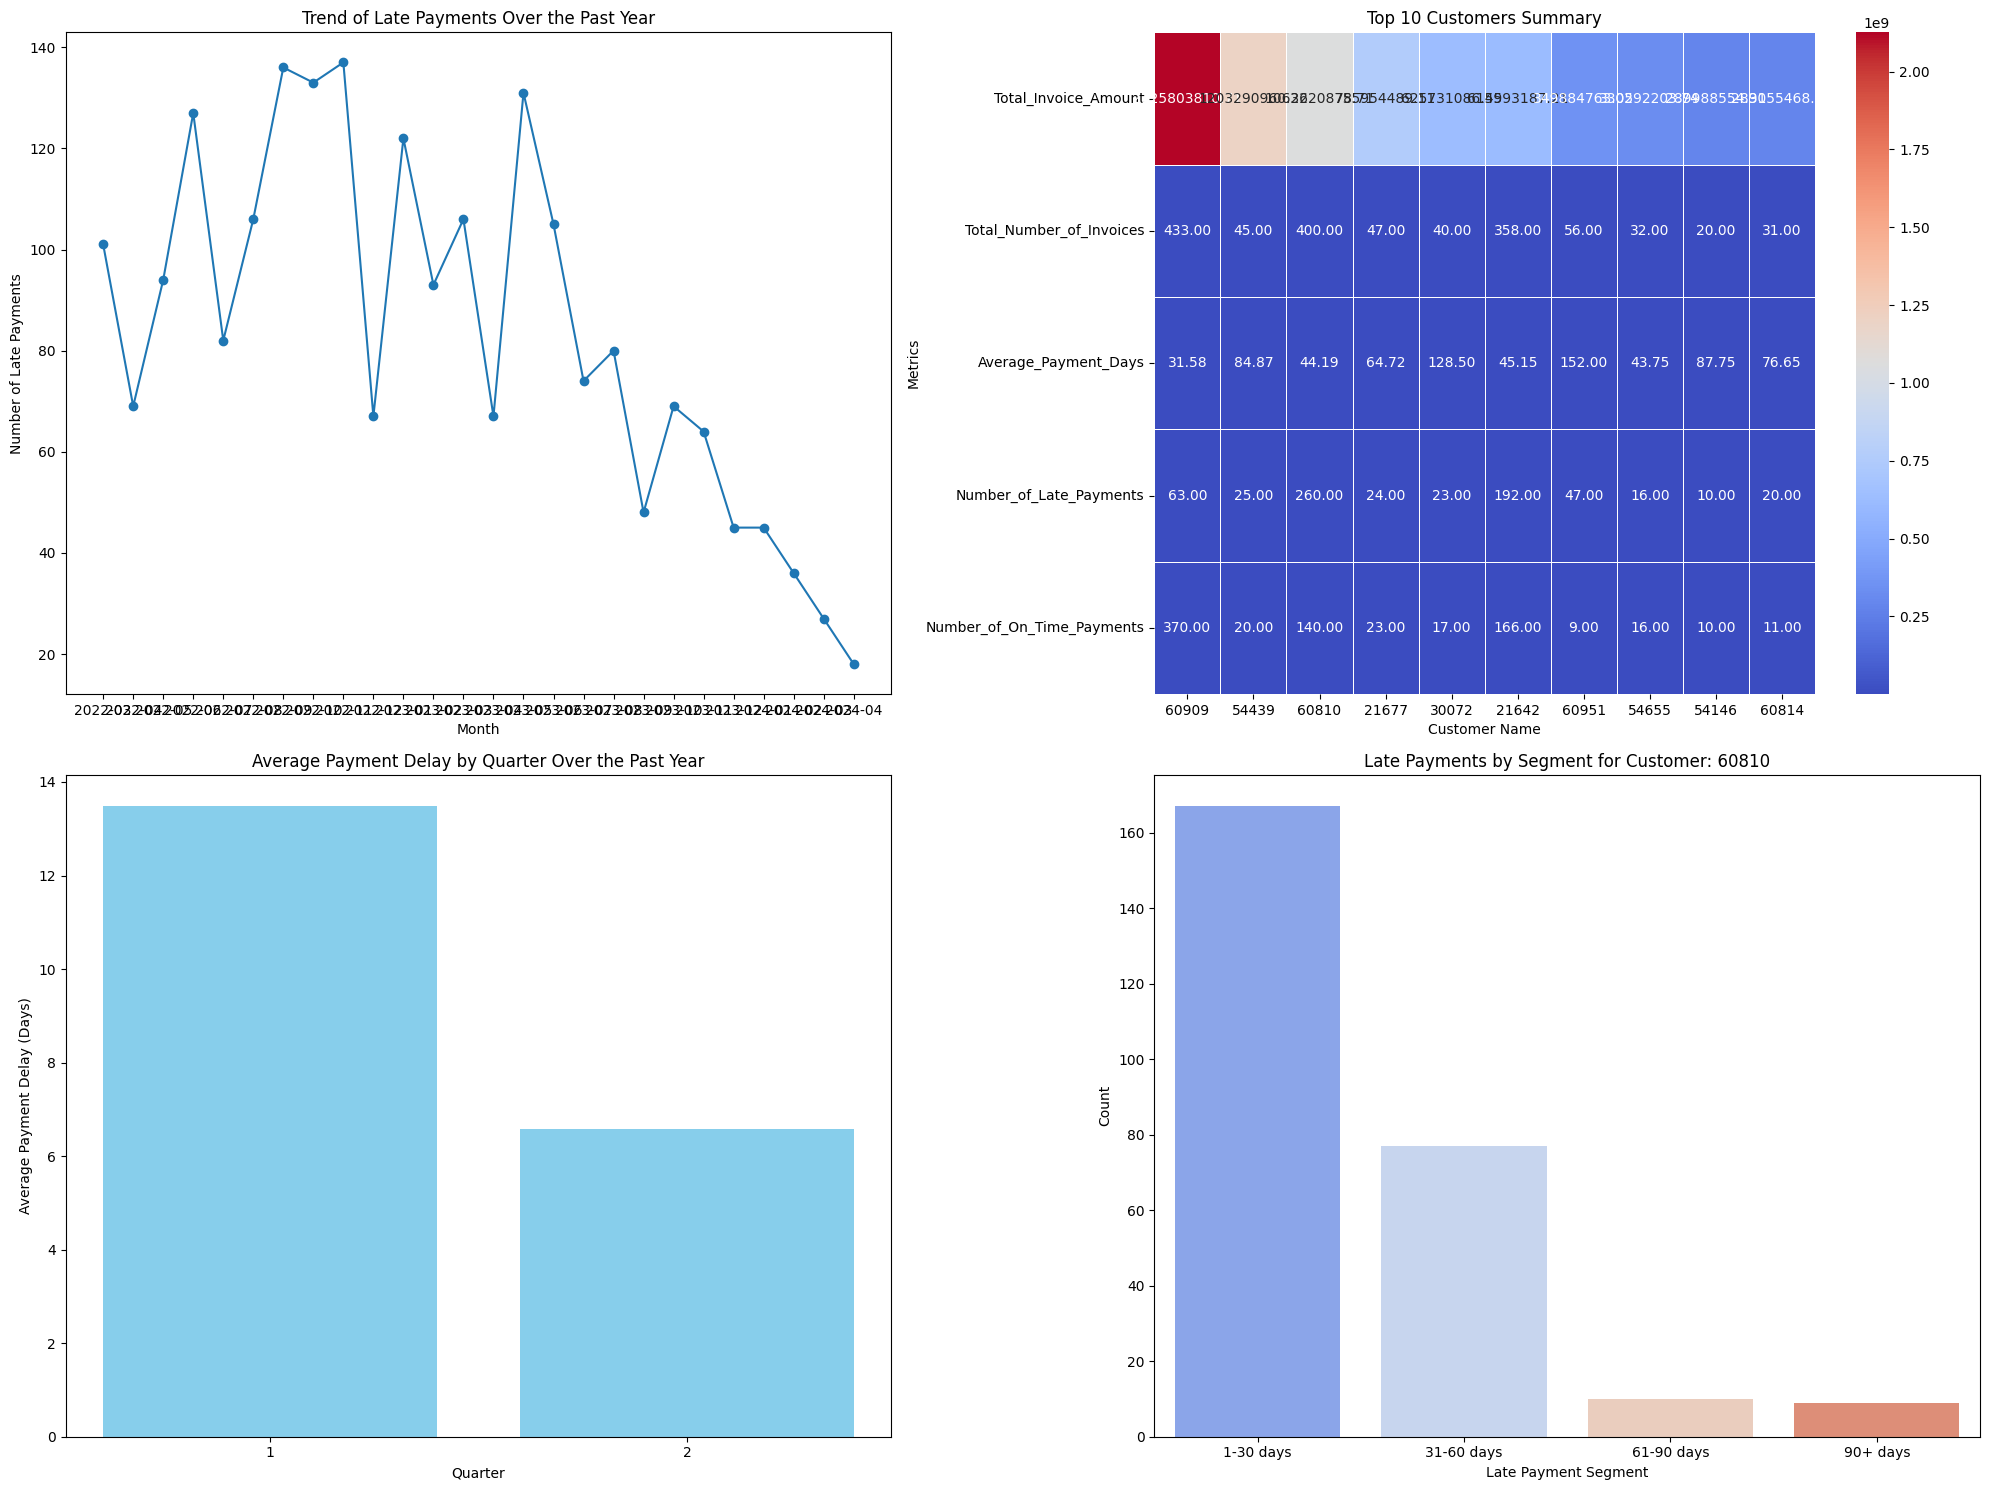

Customer with the highest number of late payments:
Name: 60810
Number of Late Payments: 260
Frequent Delinquents:
    Customer_ID  Late Payment
3         01140            30
8         03712             6
15        07368             9
36        21617             9
37        21619             8
..          ...           ...
361       60999            18
362       61119            12
371       68951            19
378       75594            12
396       87111            11

[77 rows x 2 columns]


In [74]:
# Create the dashboard
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# 1. Line graph showing the increasing trend of late payments over the past year
data['Posting Date'] = pd.to_datetime(data['Posting Date'], errors='coerce')
data['YearMonth'] = data['Posting Date'].dt.to_period('M')
late_payments_trend = data[data['Late Payment'] == 1].groupby('YearMonth').size()
axs[0, 0].plot(late_payments_trend.index.astype(str), late_payments_trend.values, marker='o', linestyle='-')
axs[0, 0].set_title('Trend of Late Payments Over the Past Year')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Number of Late Payments')

# 2. Summary statistics for top 10 customers
sns.heatmap(top_customers.set_index('Customer_ID').T, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, ax=axs[0, 1])
axs[0, 1].set_title('Top 10 Customers Summary')
axs[0, 1].set_xlabel('Customer Name')
axs[0, 1].set_ylabel('Metrics')

# 3. Bar chart showing the decrease in average payment delay by quarter over the past year
axs[1, 0].bar(avg_delay_by_quarter['Quarter'], avg_delay_by_quarter['Days Late'], color='skyblue')
axs[1, 0].set_title('Average Payment Delay by Quarter Over the Past Year')
axs[1, 0].set_xlabel('Quarter')
axs[1, 0].set_ylabel('Average Payment Delay (Days)')
axs[1, 0].set_xticks(avg_delay_by_quarter['Quarter'])

# 4. Number of late payments by segment for the customer with the highest number of late payments
sns.countplot(data=top_customer_data, x='Late Payment Segment', hue='Late Payment Segment', palette='coolwarm', legend=False, ax=axs[1, 1])
axs[1, 1].set_title(f'Late Payments by Segment for Customer: {top_late_payer["Customer_ID"]}')
axs[1, 1].set_xlabel('Late Payment Segment')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print top customer details
print(f"Customer with the highest number of late payments:")
print(f"Name: {top_late_payer['Customer_ID']}")
print(f"Number of Late Payments: {top_late_payer['Late Payment']}")

# Print frequent delinquents
threshold = 5  # You can adjust this threshold as needed
frequent_delinquents = late_payments[late_payments['Late Payment'] > threshold]
print("Frequent Delinquents:")
print(frequent_delinquents)